106.5
0.03877420783172201
[0, 1, 2, 23, 25, 61, 162, 163, 250, 256]


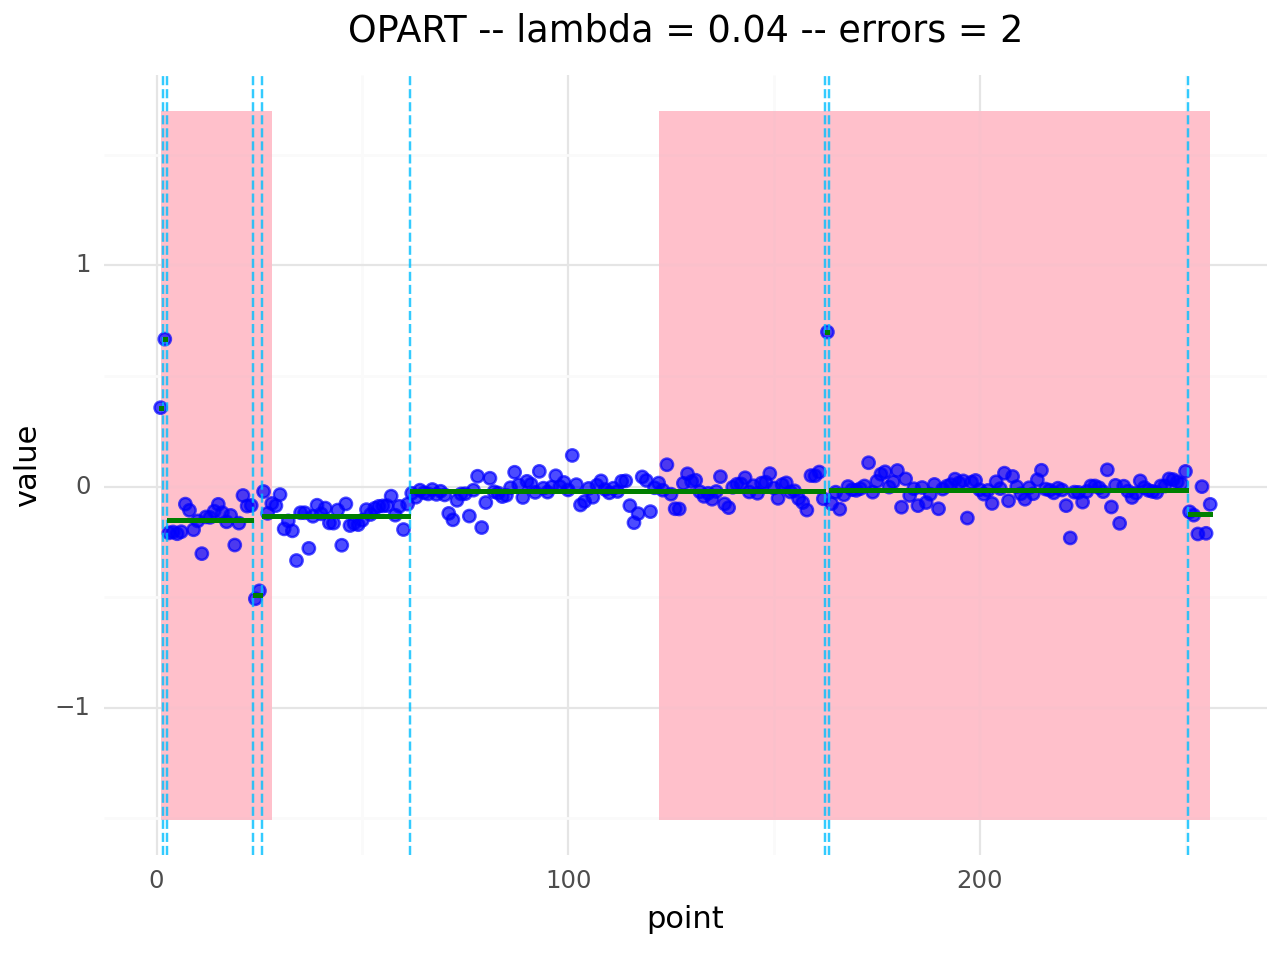

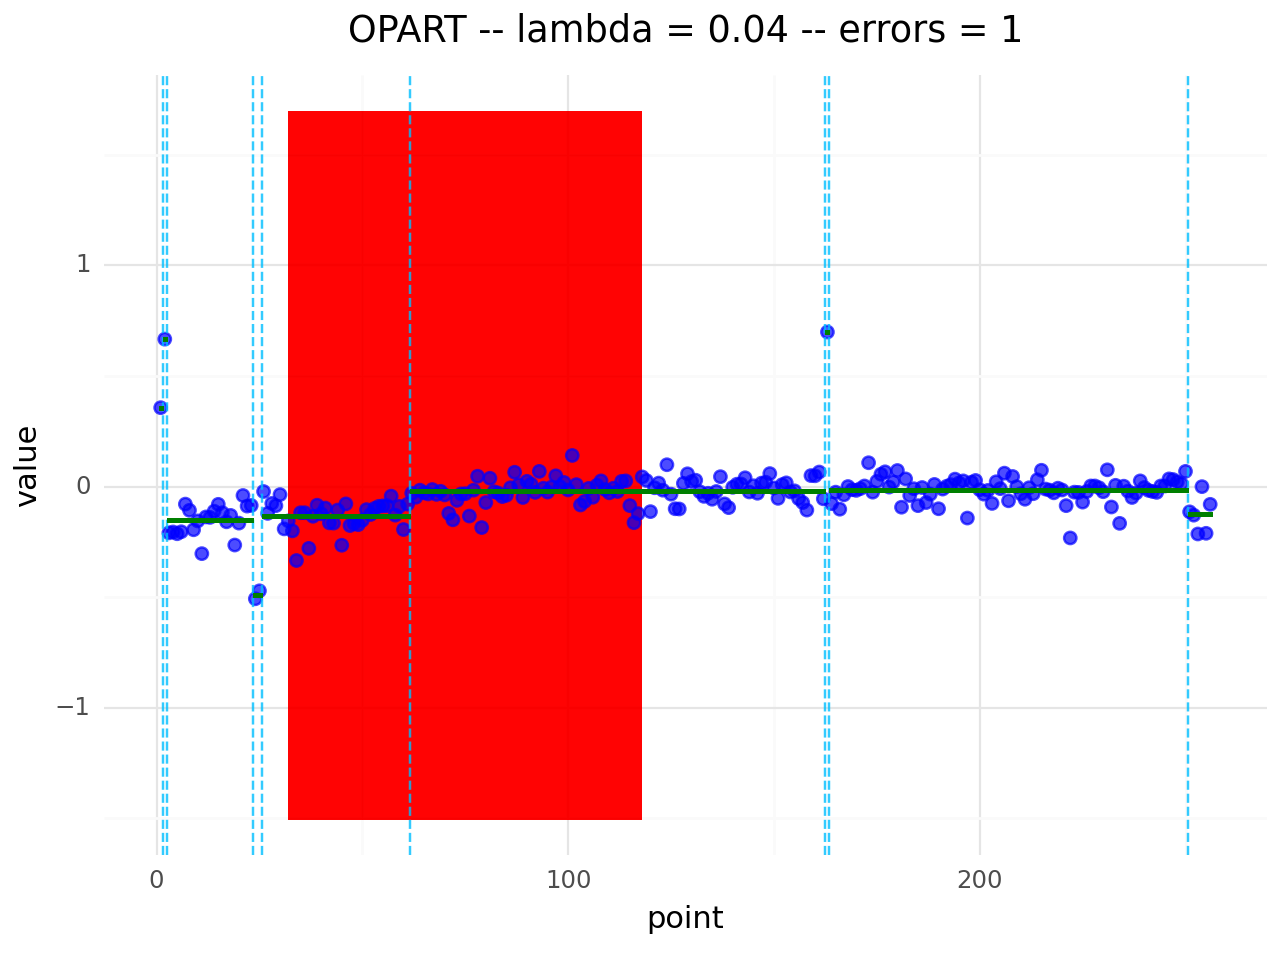

In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
from ipynb.fs.full.utility_functions import plot_sequence

In [2]:
def gen_data_dict(file_path):
    with gzip.open(file_path, 'rt') as file:
        df = pd.read_csv(file)

    _dict = tuple(df.groupby('sequenceID'))
    return _dict

In [3]:
seqs   = gen_data_dict('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/0_sequences_labels/signals.gz')
labels = gen_data_dict('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/0_sequences_labels/labels.gz')

In [4]:
def plot_section(low_target, high_target, feature):
    plt.plot([low_target, high_target], [feature, feature], color='blue', marker='o')

def plot_feature_targets(feature, low_target, high_target, feature_name):

    # Plotting each section
    for i in range(len(low_target)):
        plot_section(low_target[i], high_target[i], feature[i])

    # Adding labels and title
    plt.xlabel('Log(Lambda)')
    plt.ylabel('Feature')
    plt.title(f'Feature: {feature_name}')

    # Show the plot
    plt.show()

20138.1


C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


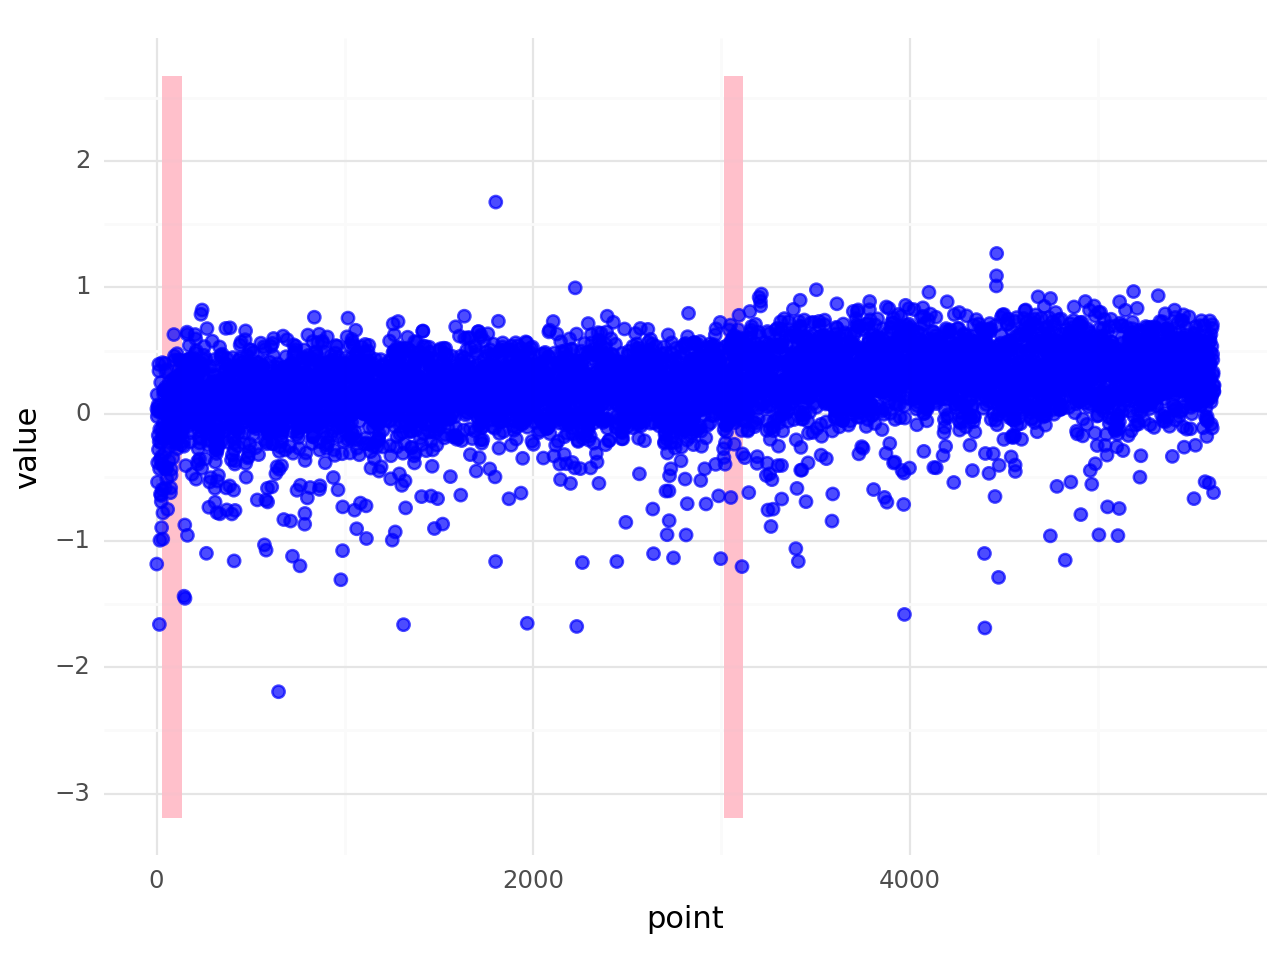

C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tln229\AppData\Local\Temp\ipykernel_16036\2423035511.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


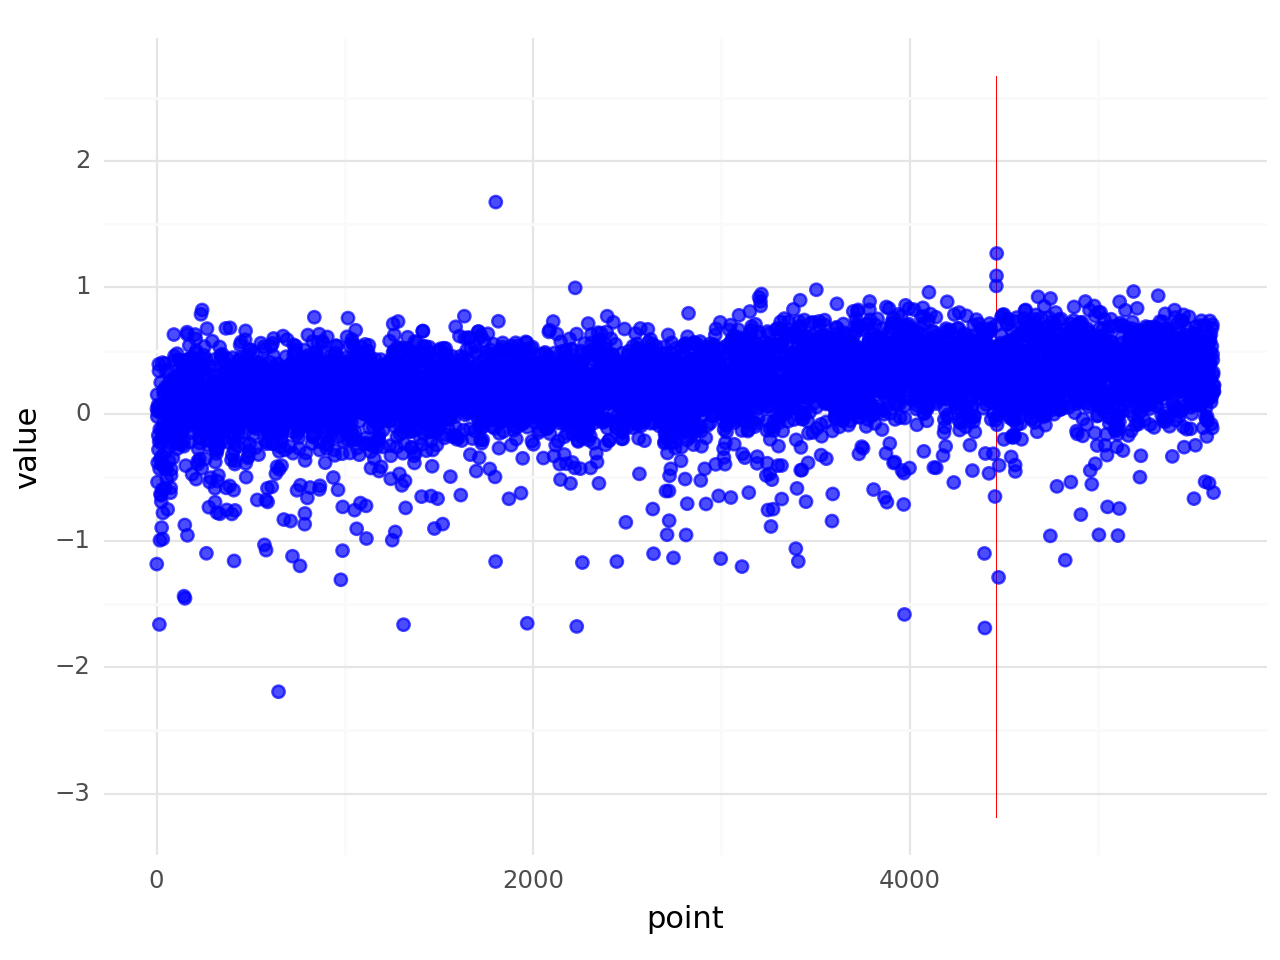

In [5]:
i = 109
print(seqs[i][0])

sequence  = seqs[i][1]['logratio'].to_numpy()

neg_start = labels[i][1][labels[i][1]['changes'] == 0][labels[i][1]['fold'] == 1]['start'].to_numpy()
neg_end   = labels[i][1][labels[i][1]['changes'] == 0][labels[i][1]['fold'] == 1]['end'].to_numpy()
pos_start = labels[i][1][labels[i][1]['changes'] == 1][labels[i][1]['fold'] == 1]['start'].to_numpy()
pos_end   = labels[i][1][labels[i][1]['changes'] == 1][labels[i][1]['fold'] == 1]['end'].to_numpy()
print(plot_sequence(sequence, neg_start, neg_end, pos_start, pos_end, algorithm=None, chpnt=None, lda=None))

neg_start = labels[i][1][labels[i][1]['changes'] == 0][labels[i][1]['fold'] == 2]['start'].to_numpy()
neg_end   = labels[i][1][labels[i][1]['changes'] == 0][labels[i][1]['fold'] == 2]['end'].to_numpy()
pos_start = labels[i][1][labels[i][1]['changes'] == 1][labels[i][1]['fold'] == 2]['start'].to_numpy()
pos_end   = labels[i][1][labels[i][1]['changes'] == 1][labels[i][1]['fold'] == 2]['end'].to_numpy()
print(plot_sequence(sequence, neg_start, neg_end, pos_start, pos_end, algorithm=None, chpnt=None, lda=None))

0 

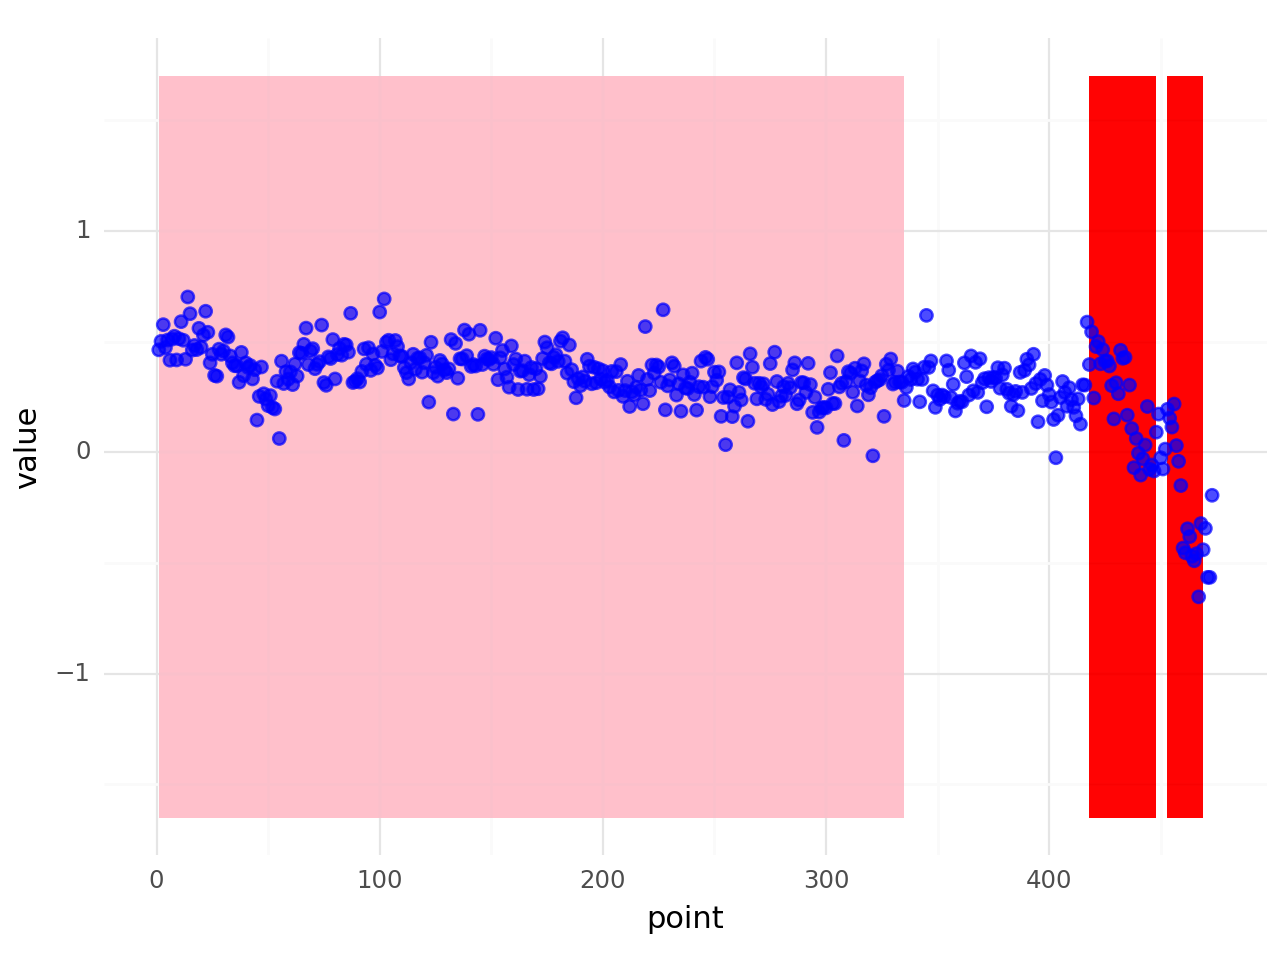

In [6]:
for i in range(1):
    sequence = seqs[i][1]['logratio'].to_numpy()
    if(len(sequence) < 1000):
        neg_start = labels[i][1][labels[i][1]['changes'] == 0]['start'].to_numpy()
        neg_end   = labels[i][1][labels[i][1]['changes'] == 0]['end'].to_numpy()
        pos_start = labels[i][1][labels[i][1]['changes'] == 1]['start'].to_numpy()
        pos_end   = labels[i][1][labels[i][1]['changes'] == 1]['end'].to_numpy()
        print(i, plot_sequence(sequence, neg_start, neg_end, pos_start, pos_end, algorithm=None, chpnt=None, lda=None))

In [7]:
seq_feature_df = pd.read_csv('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/1_training_data/seq_features.csv')
target_df      = pd.read_csv('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/1_training_data/target_lambda_bothfold_base_e.csv')

In [8]:
low  = target_df[target_df['big_end'] < 7]['small_end'].to_numpy()
high = target_df[target_df['big_end'] < 7]['big_end'].to_numpy()

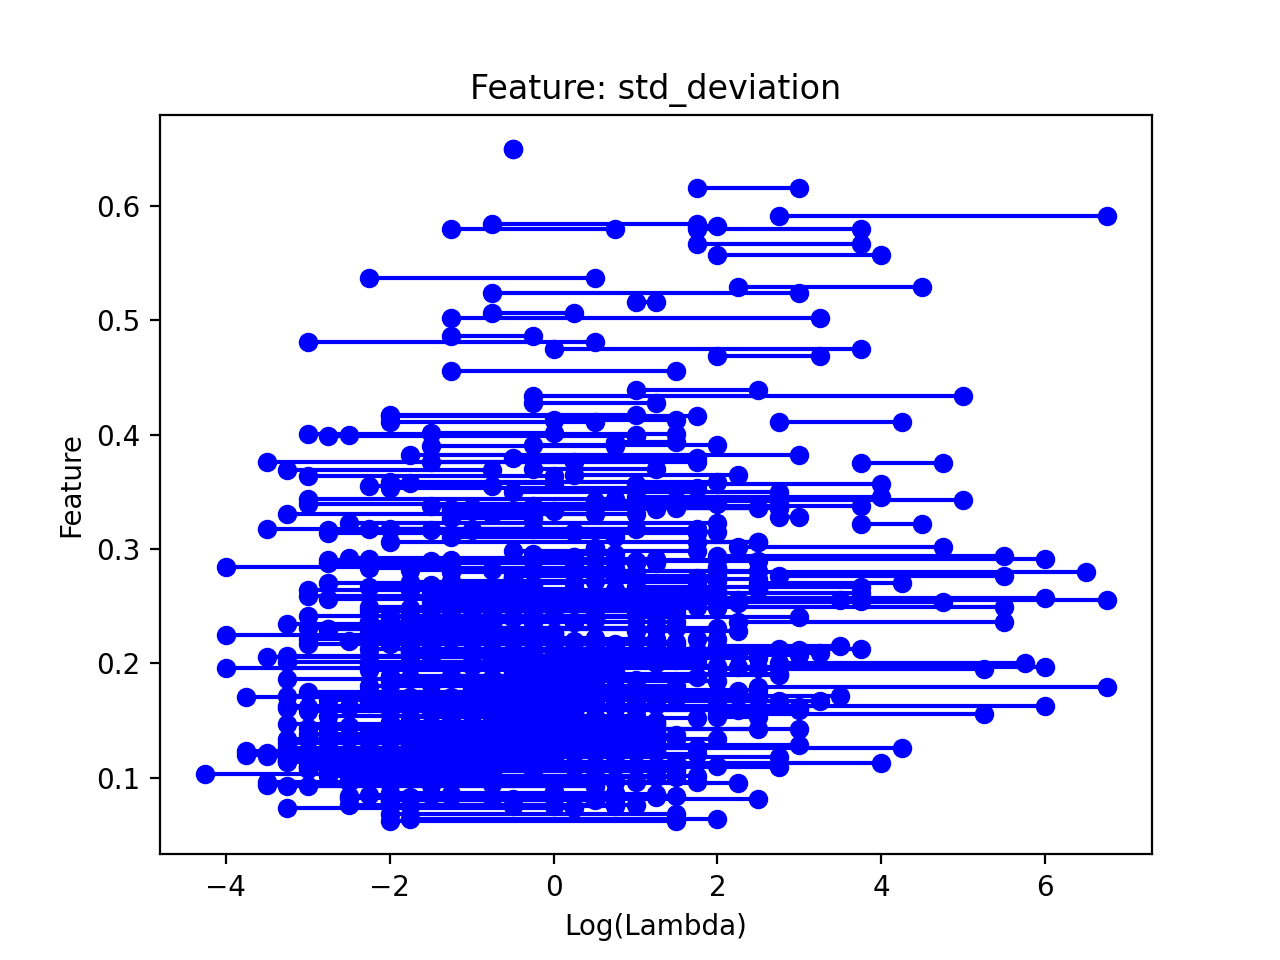

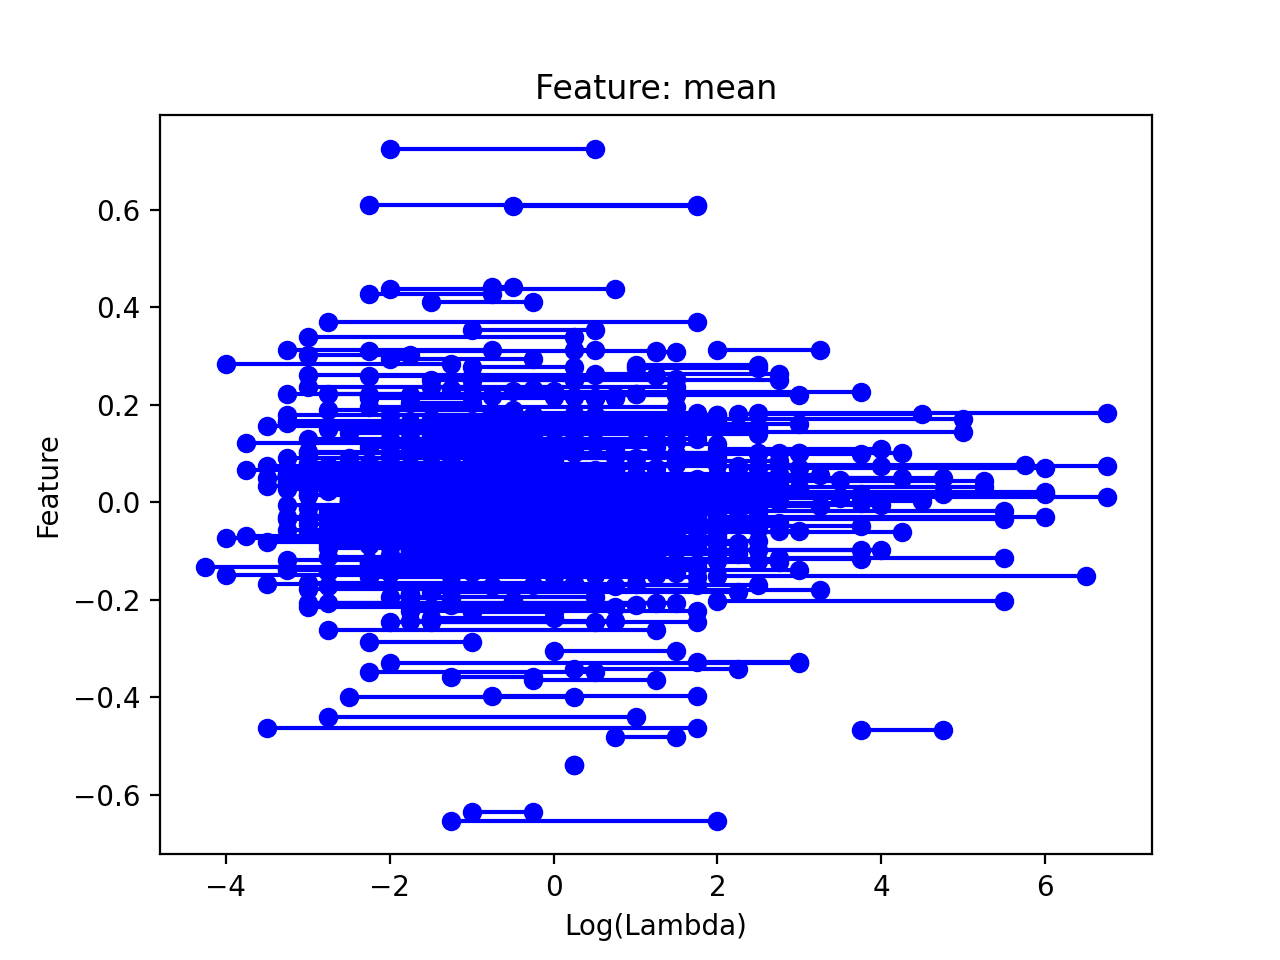

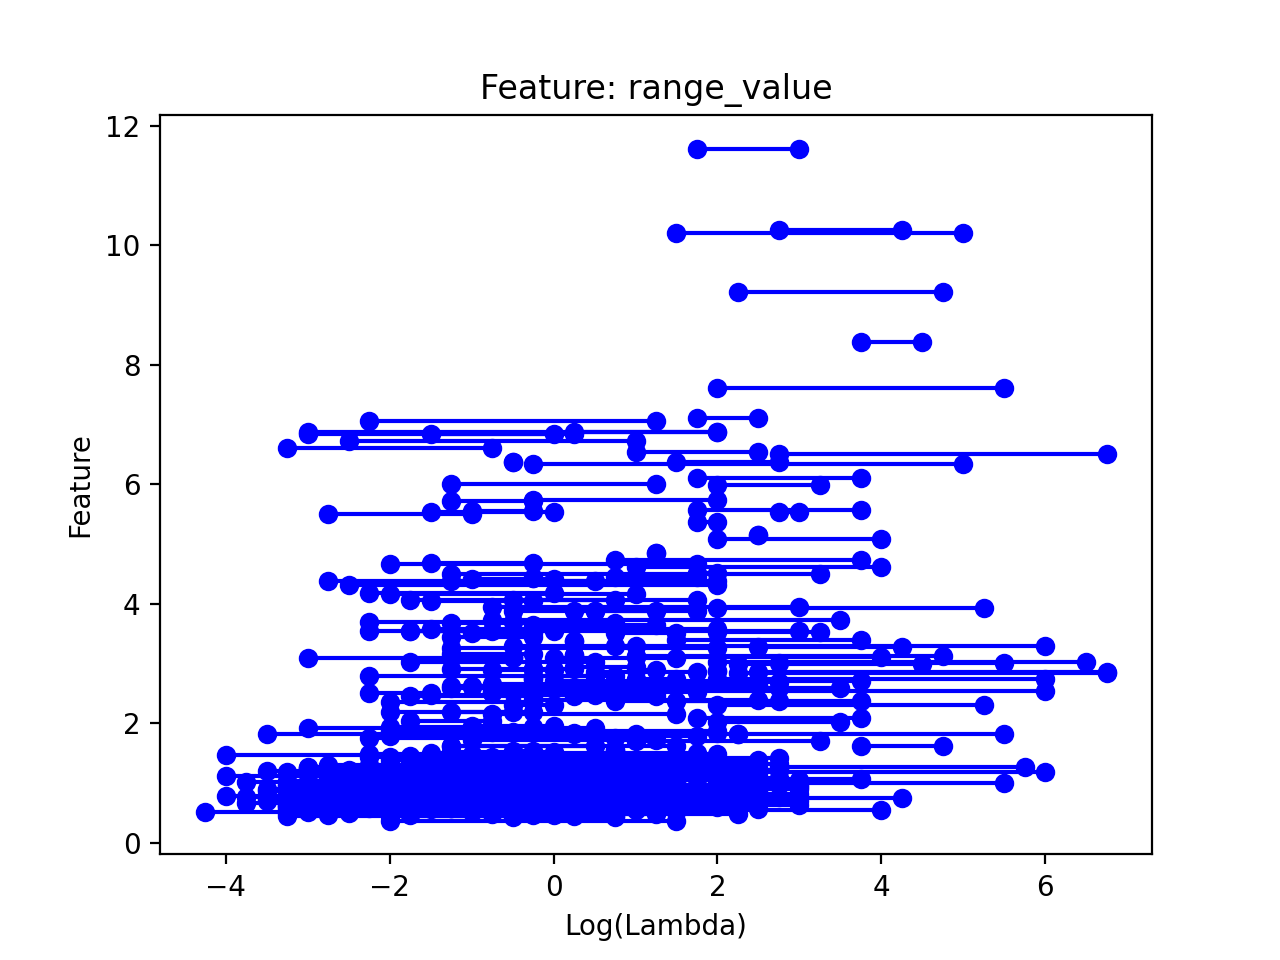

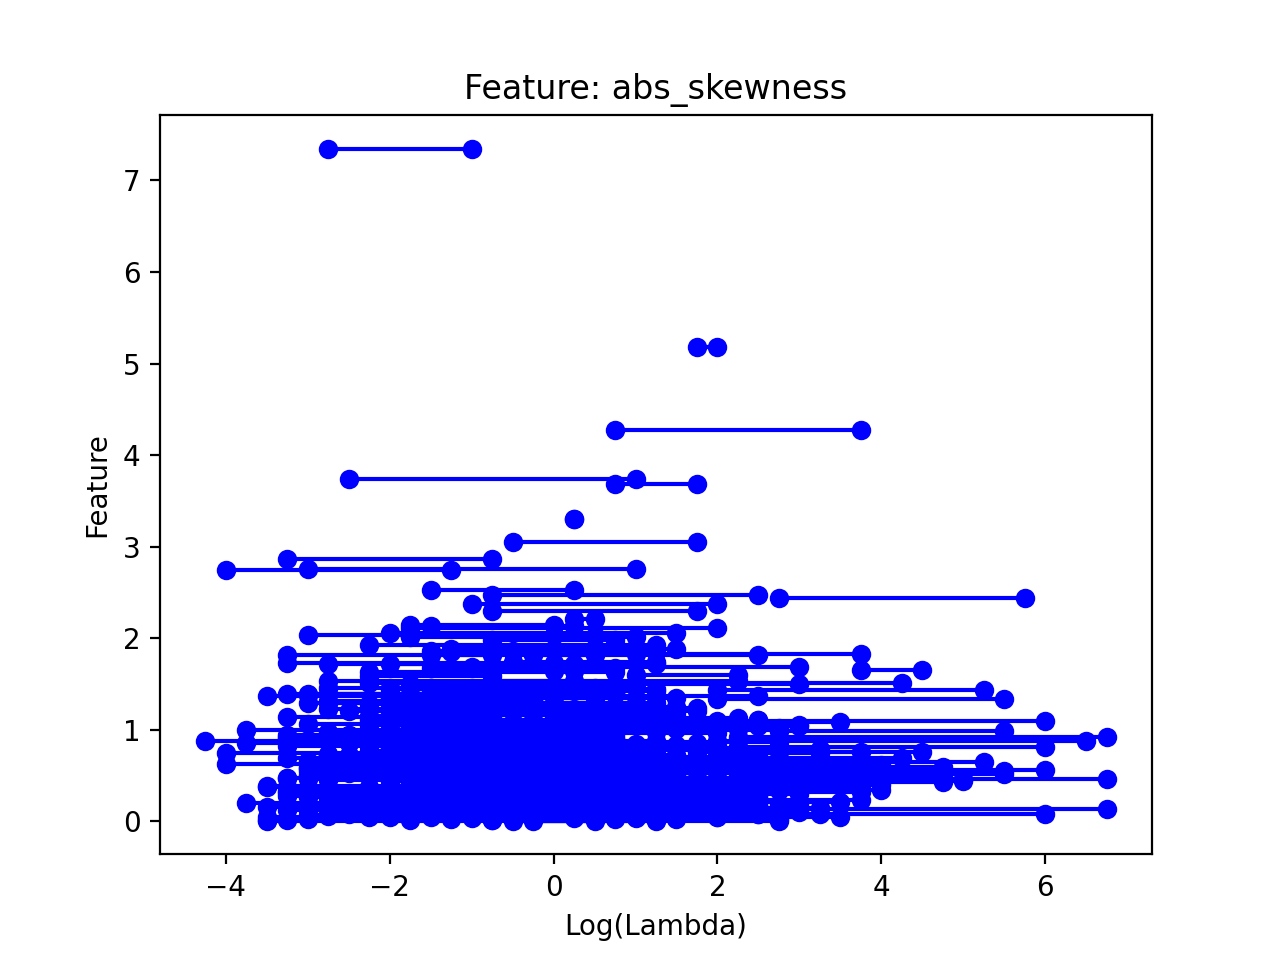

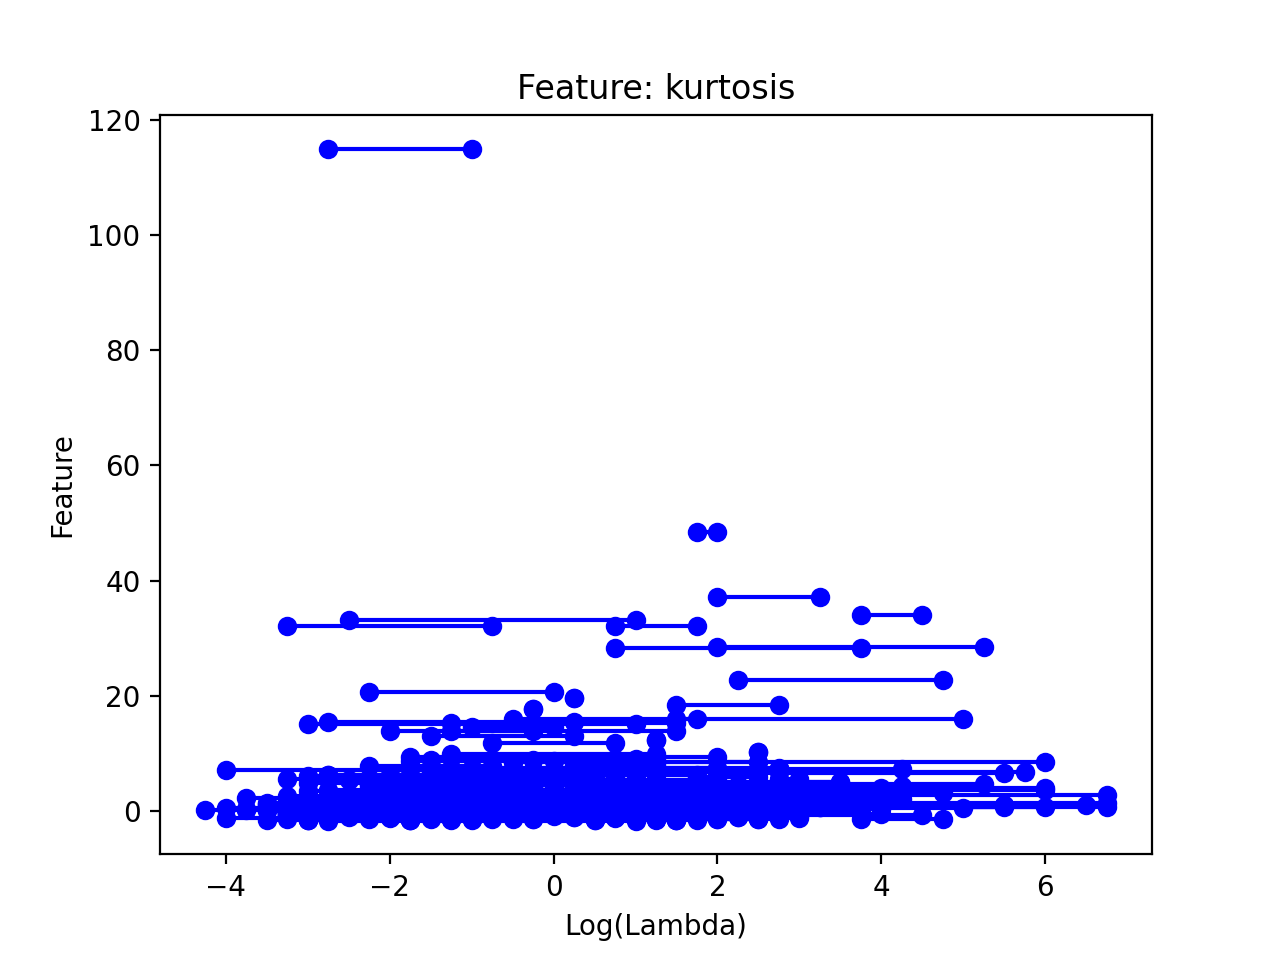

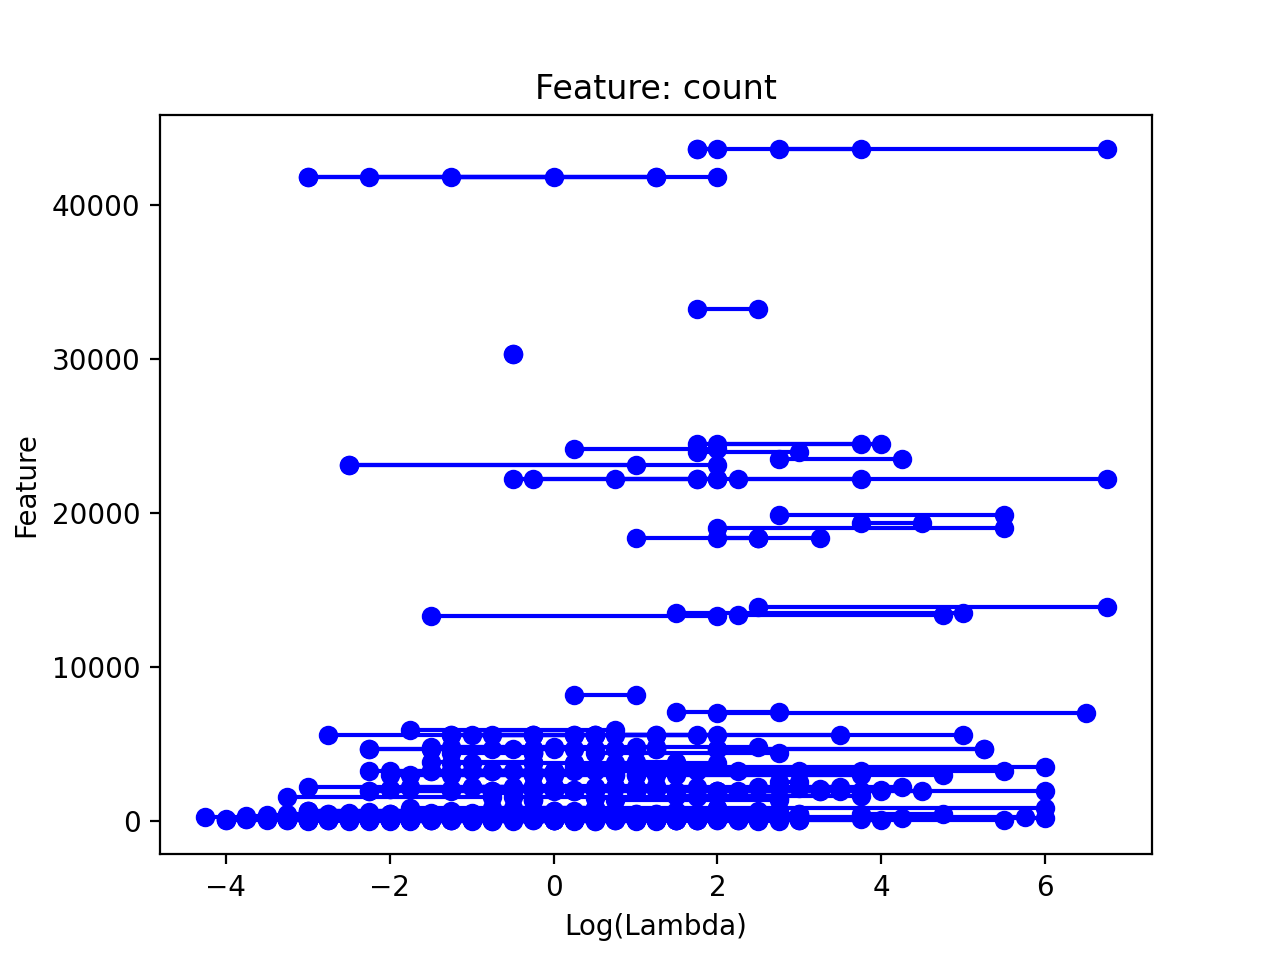

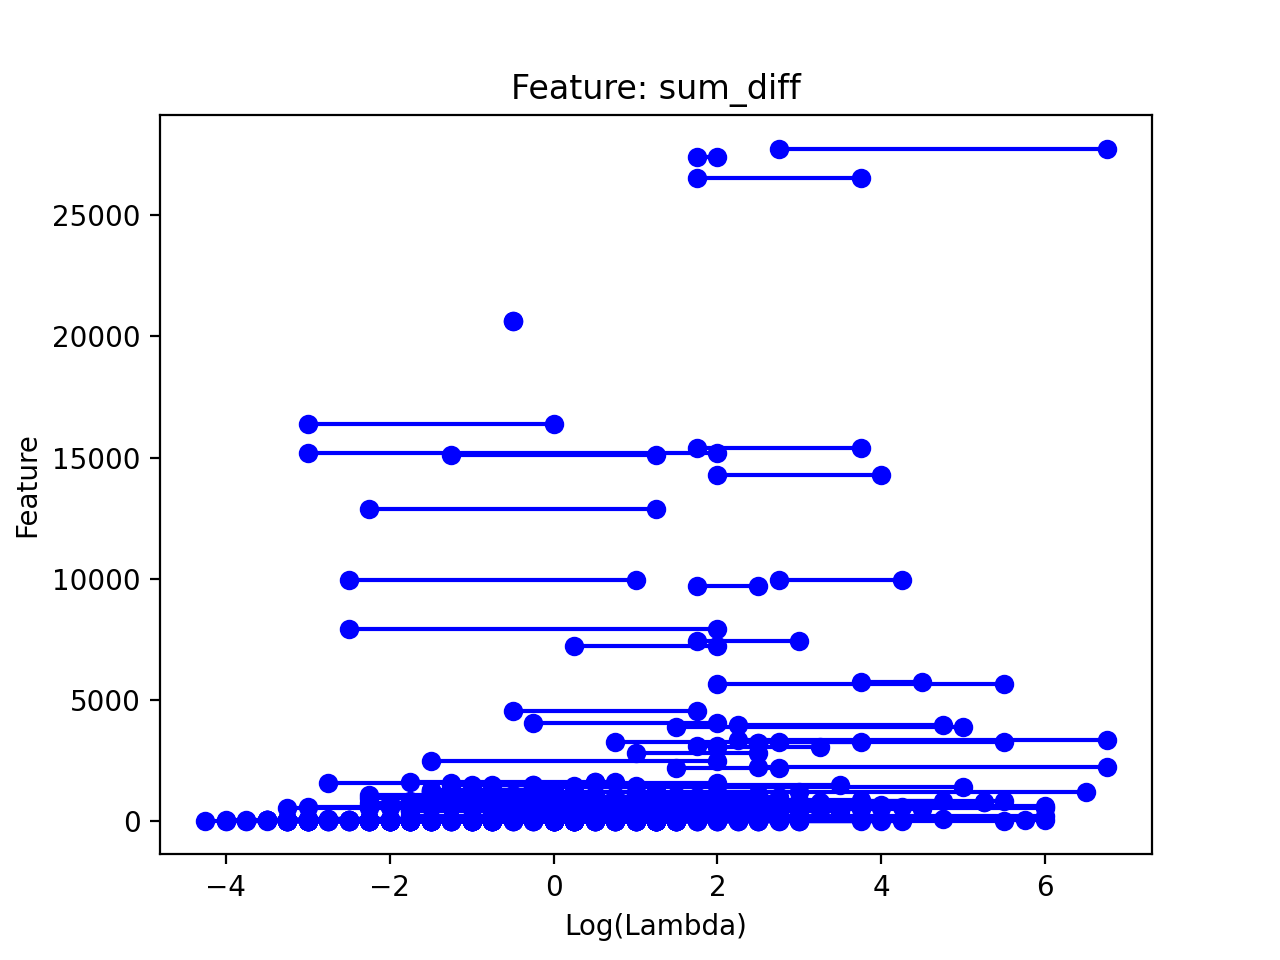

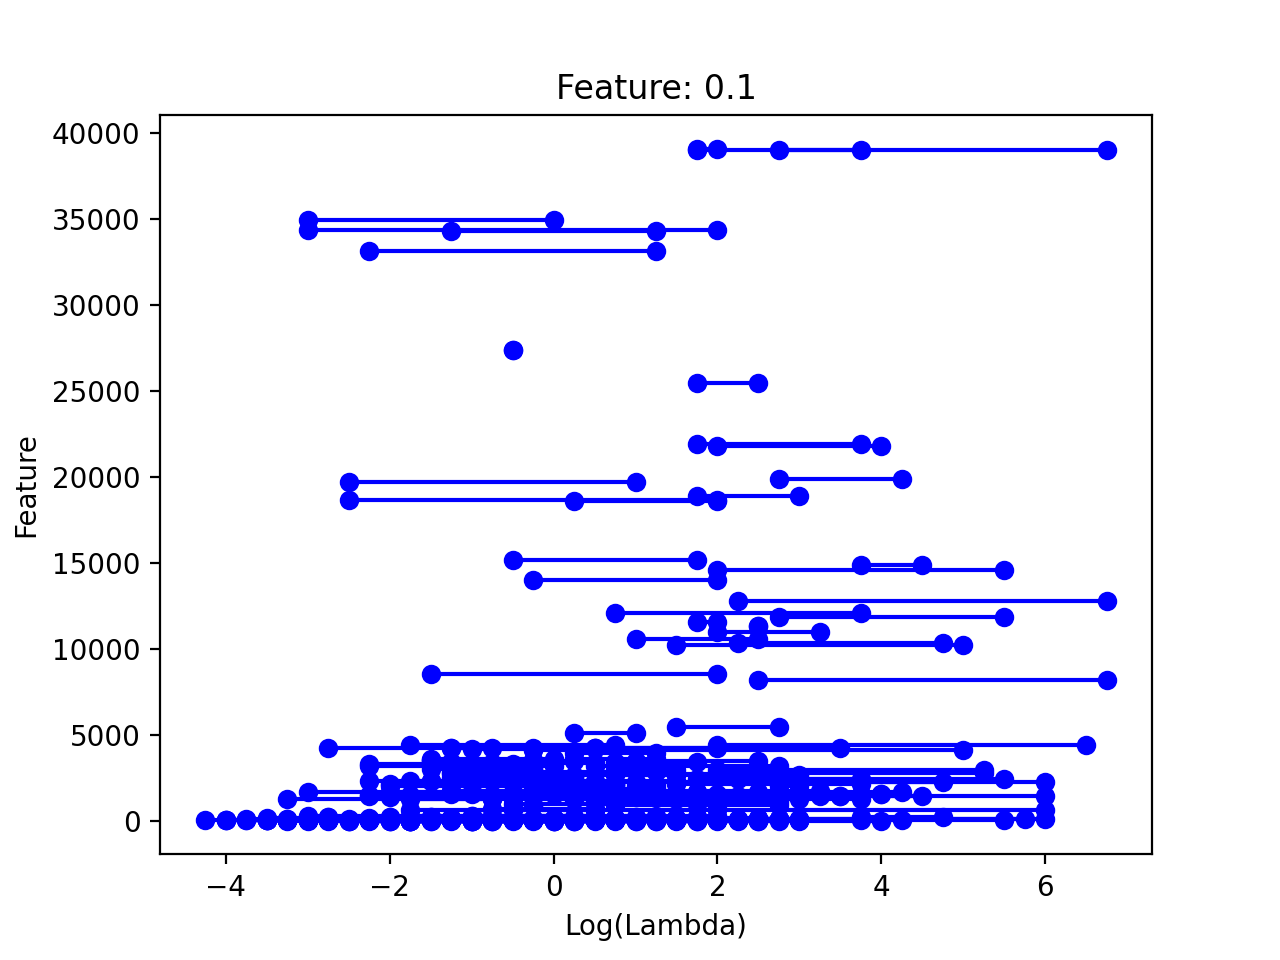

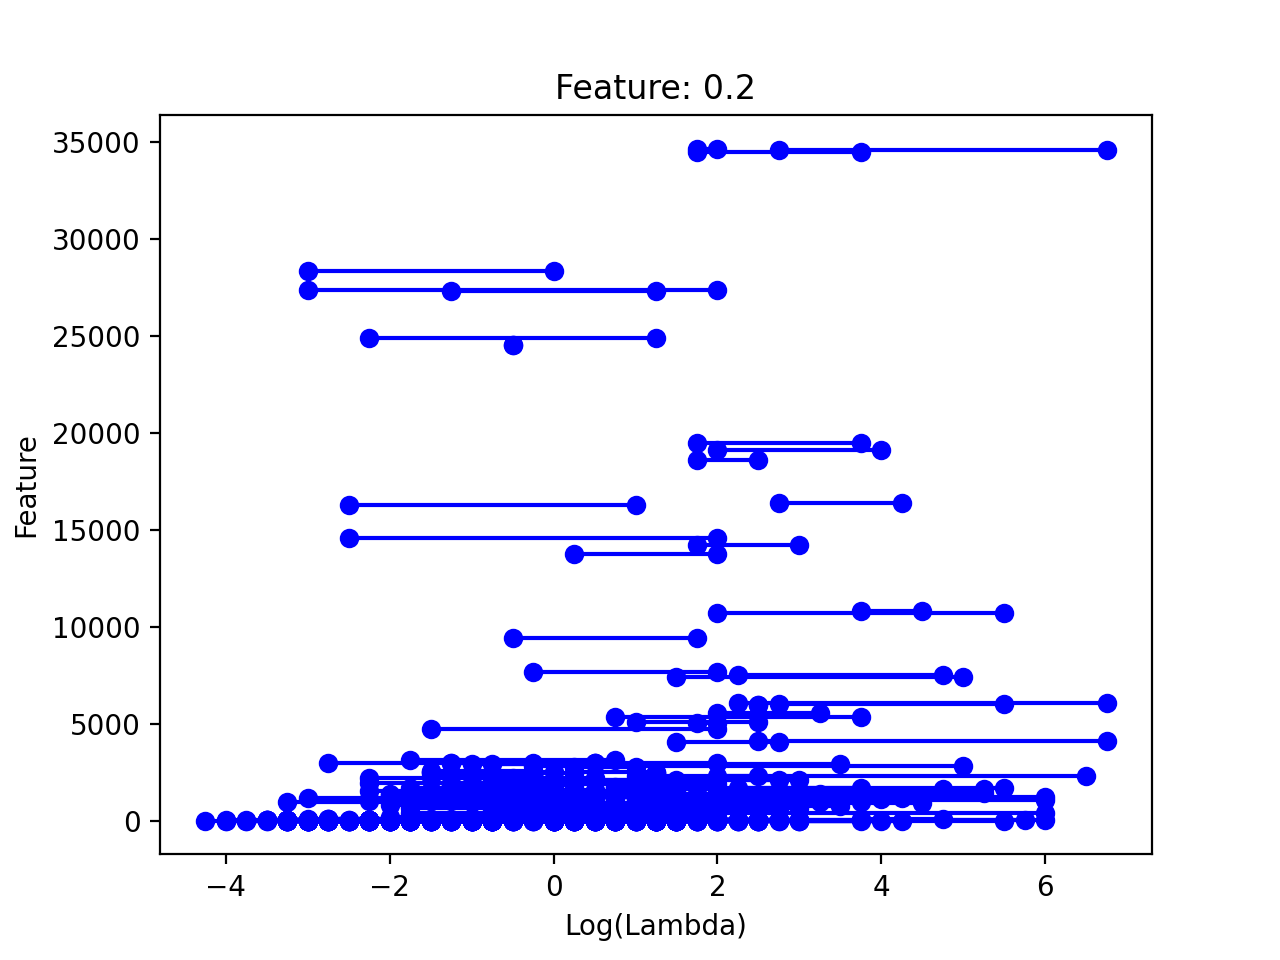

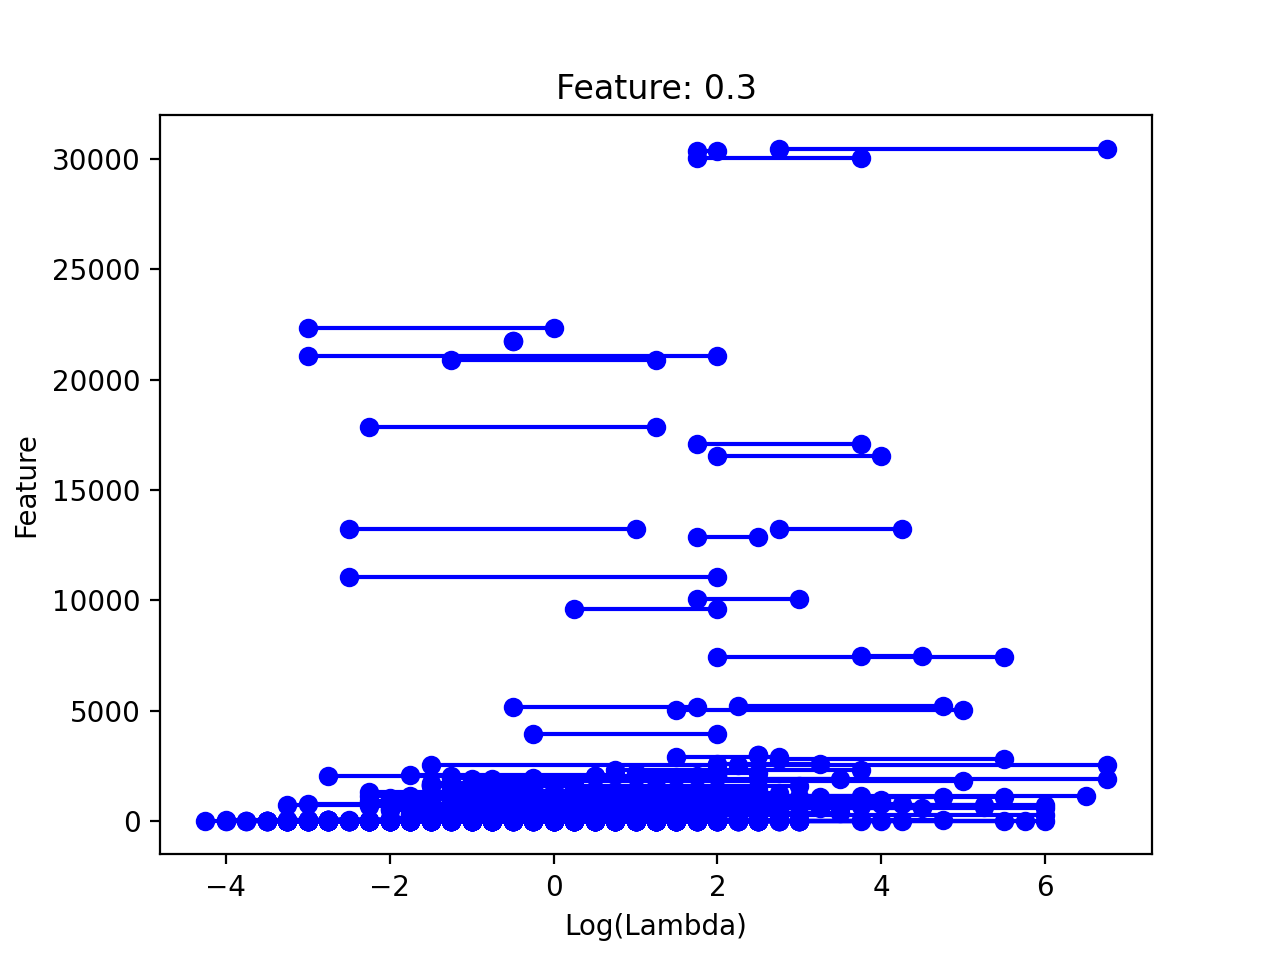

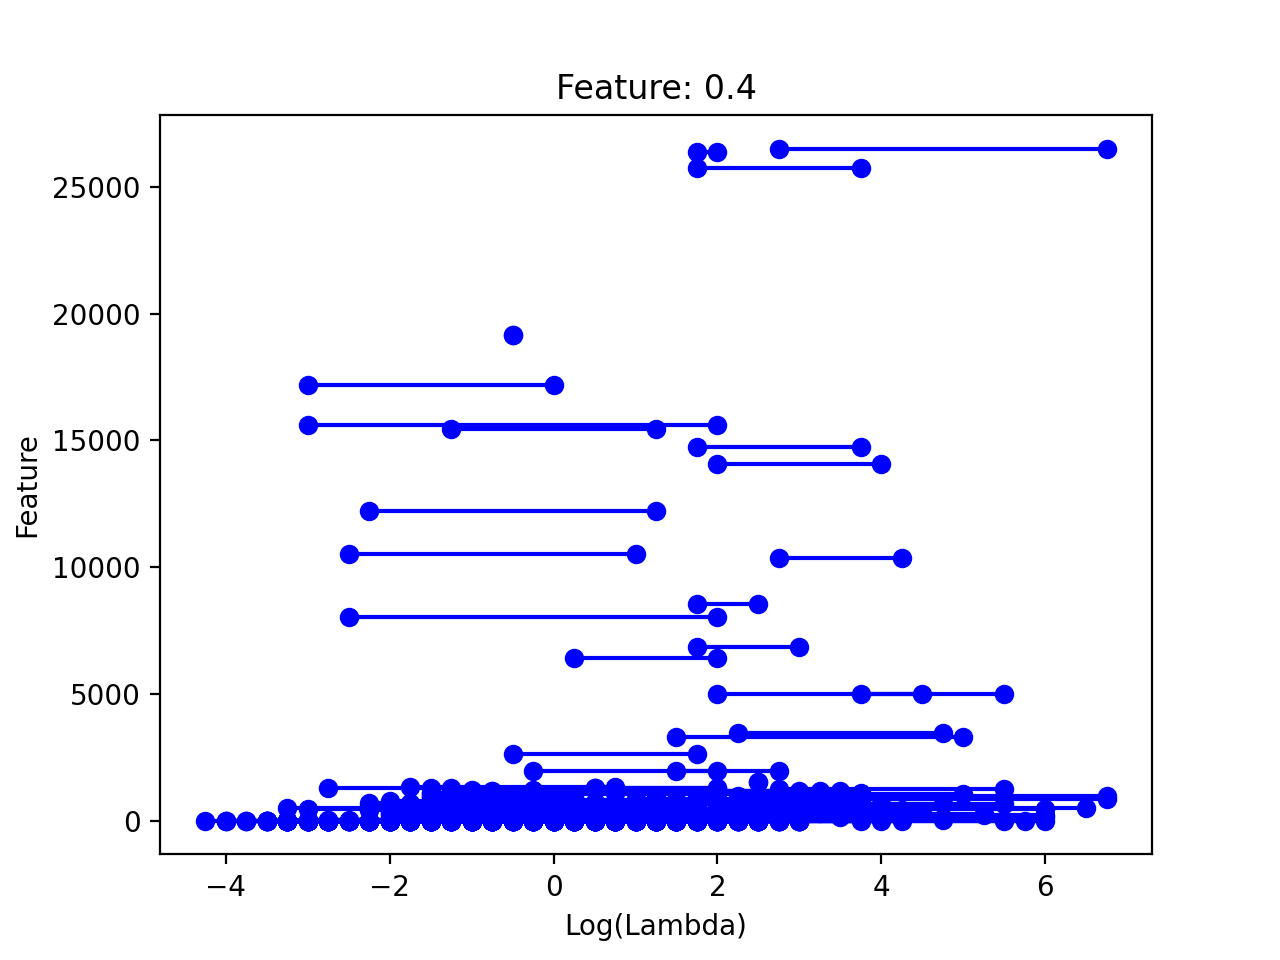

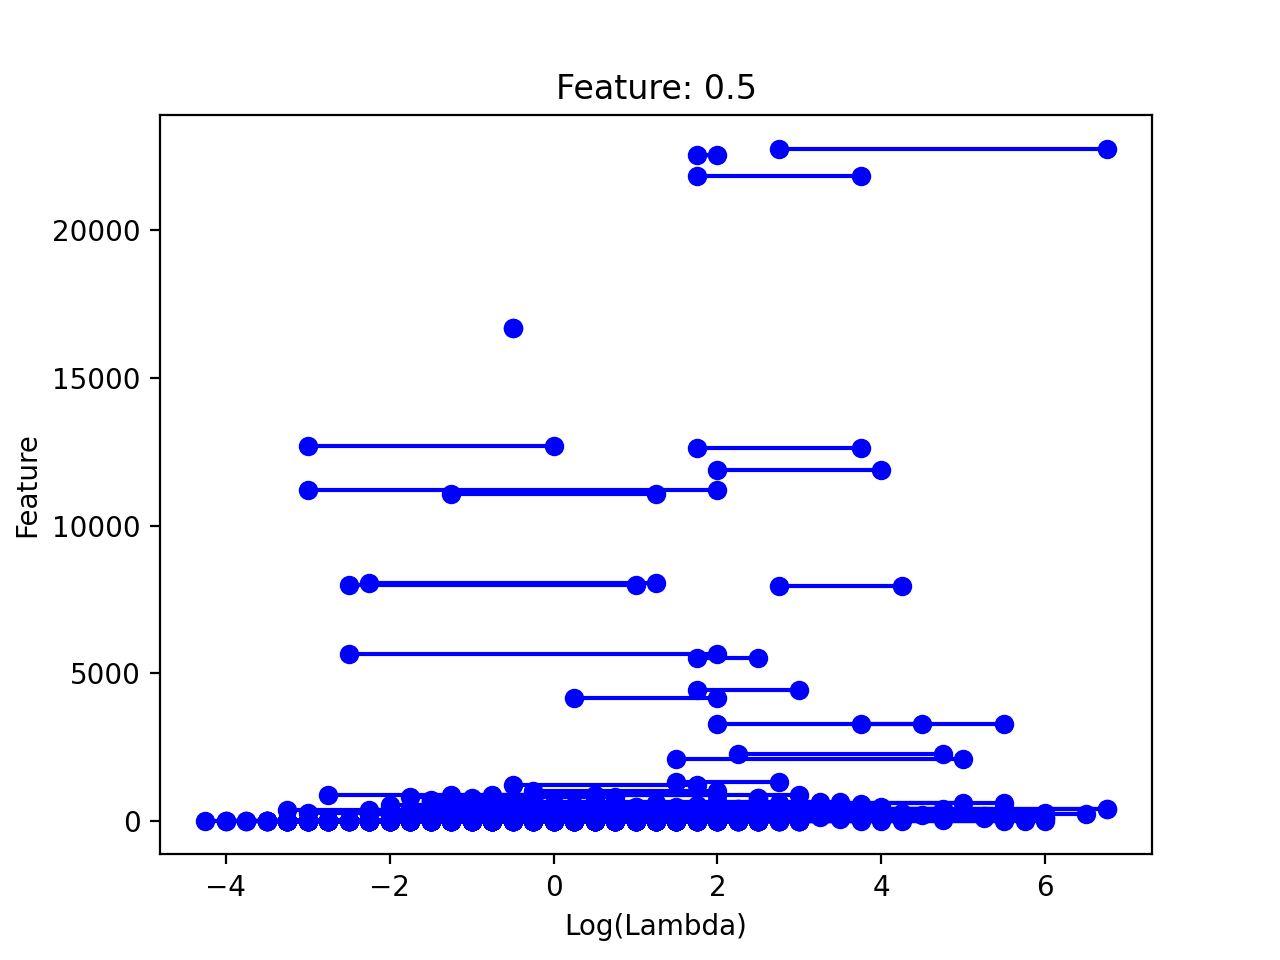

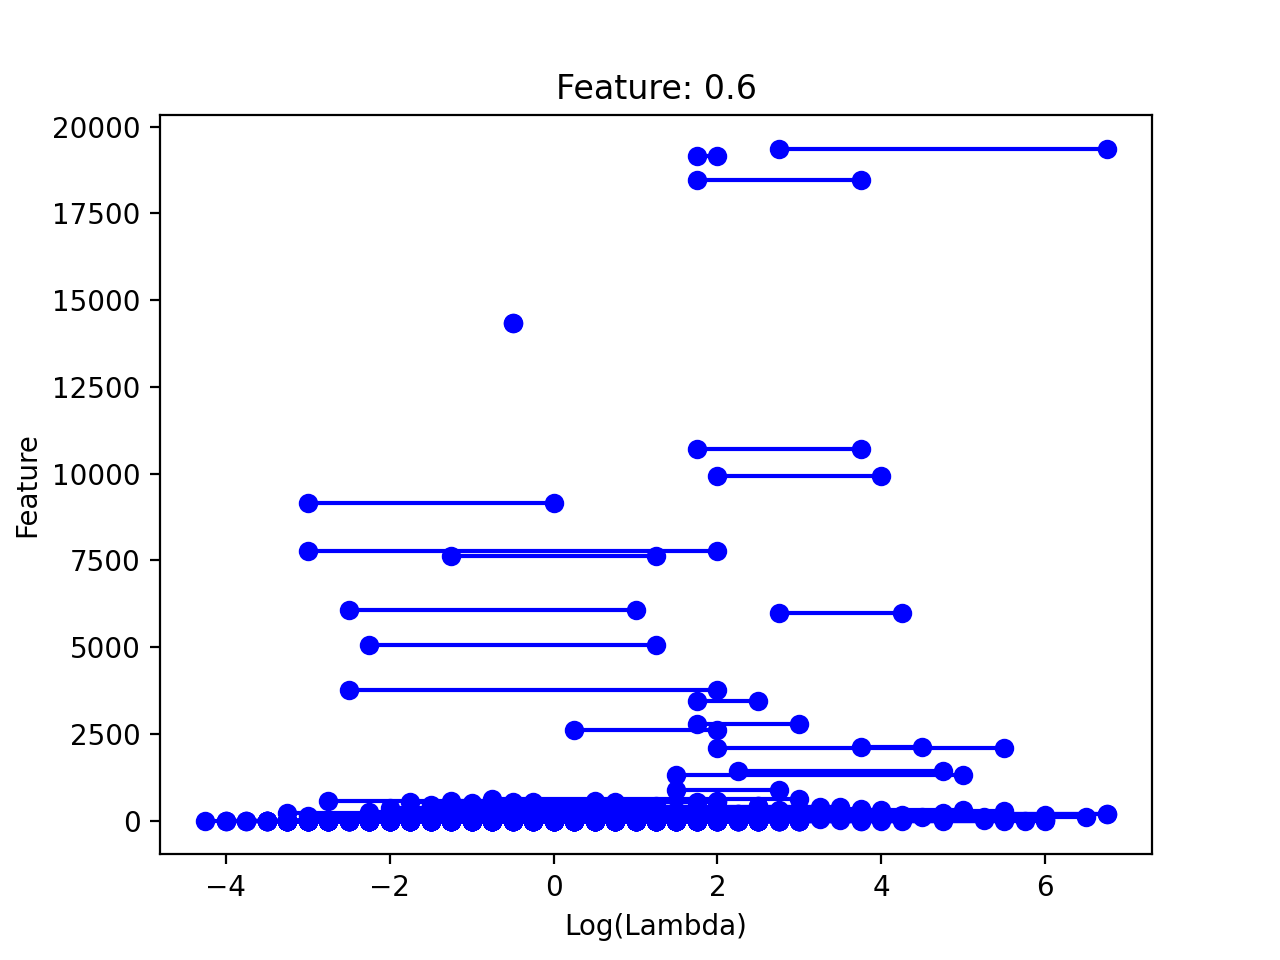

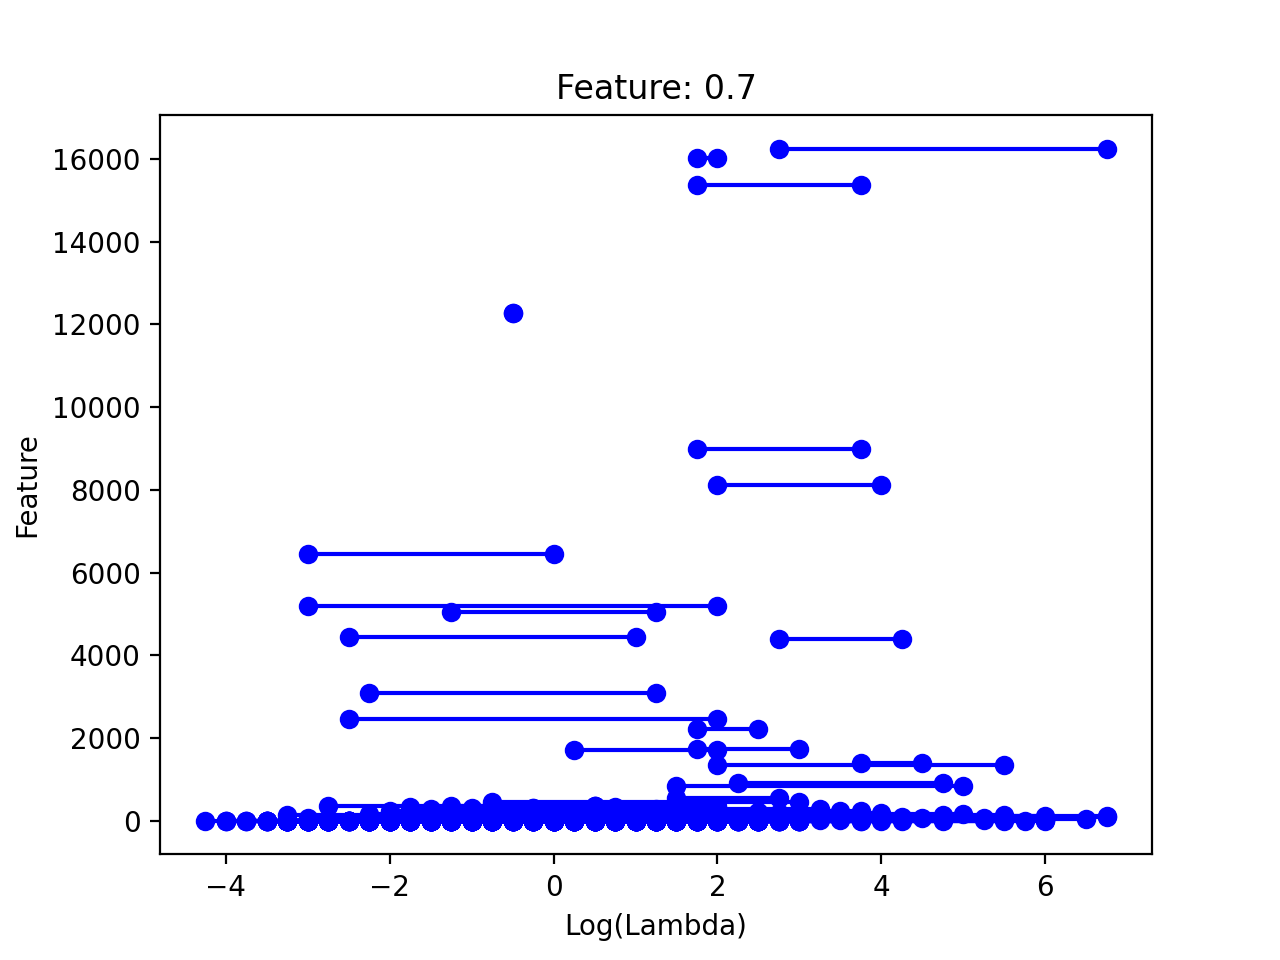

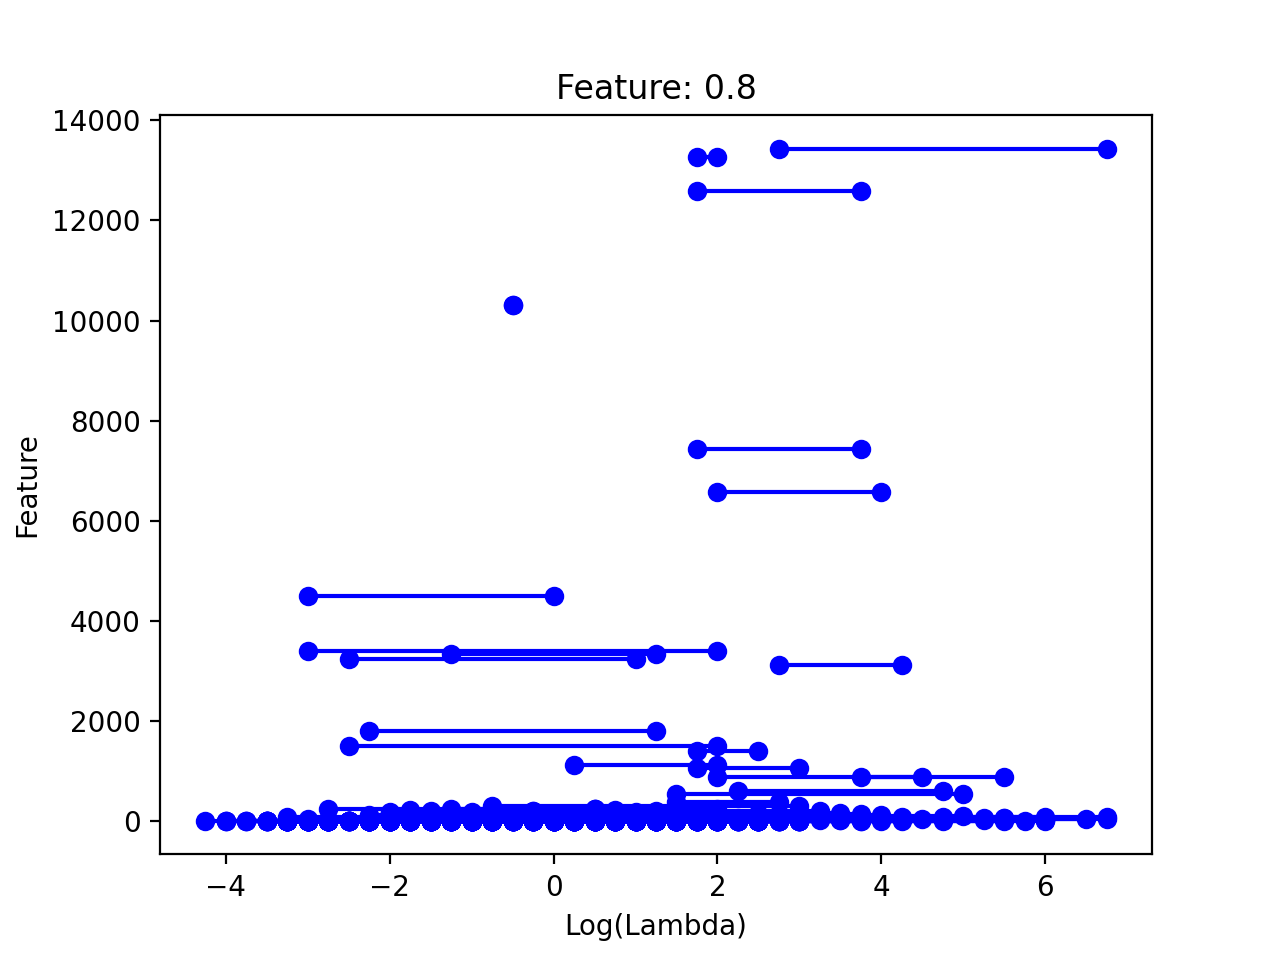

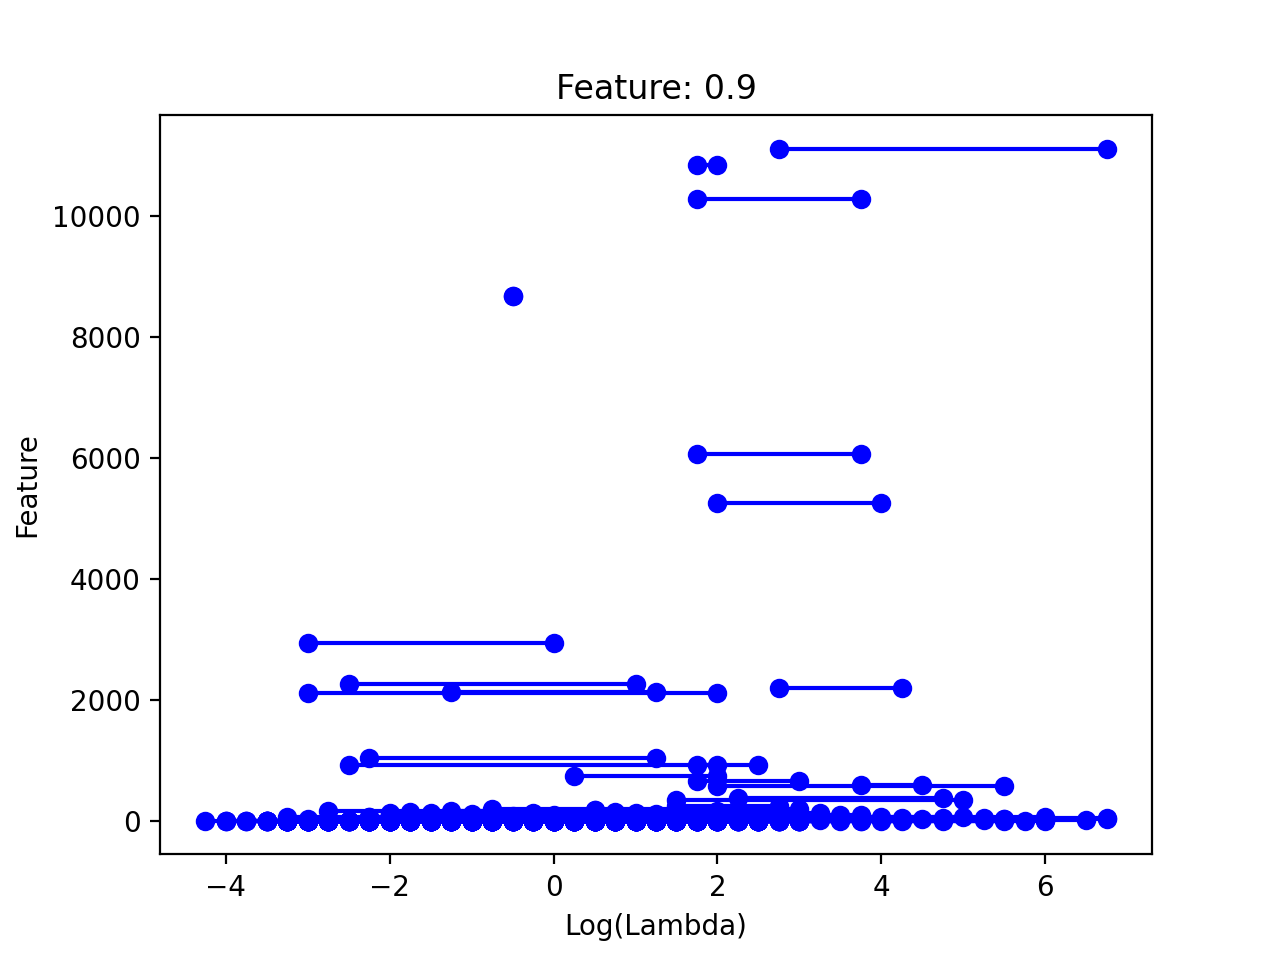

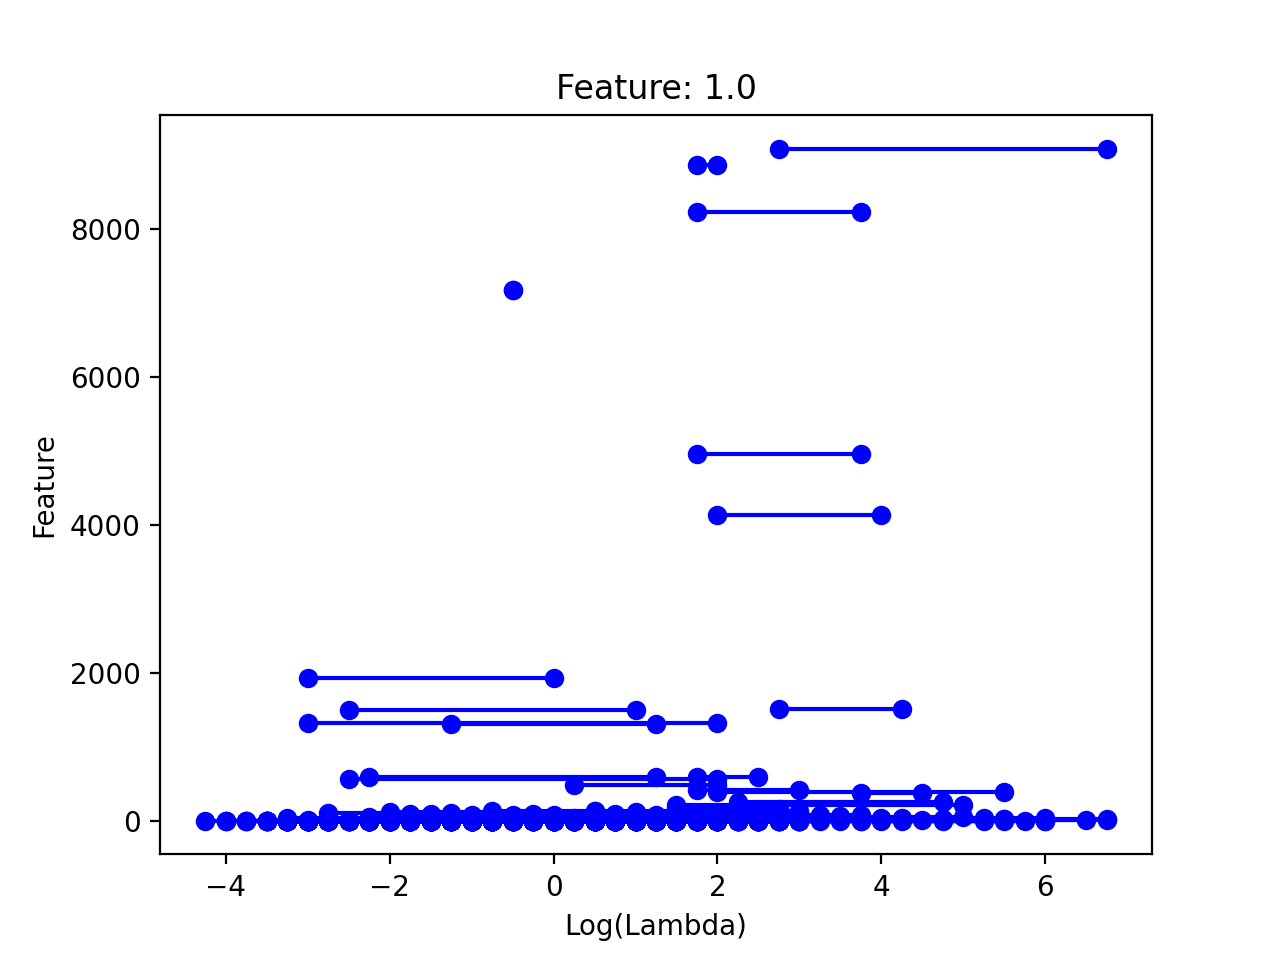

In [9]:
for i in range(1, seq_feature_df.shape[1]):
    y = seq_feature_df.iloc[:, i].to_numpy()
    plot_feature_targets(y, low, high, seq_feature_df.columns.tolist()[i])